# NLP ASSIGNMENT

## Problem Statement
- Find the frequency of words in a webpage. 
- User can use urllib and BeautifulSoup to extract text from webpage.


### pip install beautifulsoup4 
The following command must be run outside of the IPython shell:

    $ pip install beautifulsoup4 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/

In [6]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Access the webpage and print the html

In [7]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [8]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

## Using Regular Expressions to Extract Tokens

In [9]:
text = soup.get_text()
tokens = re.findall('\w+', text)

In [10]:
tokens[:20]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language',
 'Reference',
 'Basic',
 'syntax',
 'Types',
 'Variables']

### Converting tokens to lower case

In [11]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]
  

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

## Removing Stopwords

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TEMP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [14]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]
    

Total including stopwords: 5908
Length after stopwords: 3785
Total removed stopwords: 2123


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

## Words Frequency distribution

In [15]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 378 types and 3785 tokens for a lexical diversity of 10.013


In [16]:
print(counts.most_common(10))

[('php', 300), ('7', 186), ('release', 162), ('found', 104), ('3', 93), ('4', 77), ('please', 75), ('version', 73), ('upgrading', 71), ('file', 70)]


In [17]:
print(counts.max())

php


## Frequency of words in a webpage

In [22]:
counts.freq('php')

0.07926023778071334

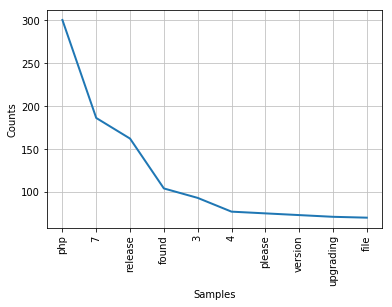

In [27]:
counts.plot(10, cumulative=False)